# Advanced Level

# Task 9 : Handwritten equation solver using CNN

<center><img src = "https://images.unsplash.com/photo-1581089778245-3ce67677f718?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"></center>

<center><h1>➗ Handwritten Equation Solver ➗</h1></center>

# Loading Libraries

In [1]:
print("Loading...")

# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Done")

Loading...
Done


# Creating Data

In [2]:
p = "../input/handwritten-math-symbols/dataset/"

print("These are the folders we'll be working with :")

for f in os.listdir(p):
    print(f)

These are the folders we'll be working with :
7
2
5
div
8
x
0
y
z
add
3
eq
dec
sub
1
4
9
mul
6
.directory


In [3]:
def load_images(folder):
    
    train_data=[]
    
    for filename in os.listdir(folder):
        
        if filename != ".directory" :

            image = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            image = ~image

            if image is not None:

                ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
                contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
                contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

                a = int(28)
                b = int(28)
                maxi = 0

                for c in contour:

                    x,y,a,b=cv2.boundingRect(c)
                    maxi=max(a*b,maxi)

                    if maxi==a*b:

                        x_max=x
                        y_max=y
                        w_max=a
                        h_max=b

                im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
                im_resize = cv2.resize(im_crop,(28,28))
                im_resize = np.reshape(im_resize,(784,1))
                train_data.append(im_resize)
            
    return train_data

# Concatenating Data of All Characters

In [4]:
data = []

data = load_images(p+"0")
for i in range(0, len(data)):
    data[i] = np.append(data[i], ['0'])
print(len(data))

595


In [5]:
iter = 0

for i in list(os.listdir(p)) :
    
    if i not in ["0", ".directory"] :
    
        print("Iter :", iter)
        print("Working with the", i, "folder")

        data_i = load_images(p+i)

        if i in [str(k) for k in range(1, 10)] :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])

        if i == "add" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])

        if i == "sub" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])


        if i == "mul" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])

        if i == "div" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])

        if i == "eq" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])                

        if i == "dec" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["15"])

        if i == "x" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["16"])

        if i == "y" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["17"]) 


        if i == "z" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["18"]) 


        data = np.concatenate((data, data_i))
        print(len(data))

        print()

        iter += 1

Iter : 0
Working with the 7 folder
1128

Iter : 1
Working with the 2 folder
1561

Iter : 2
Working with the 5 folder
1994

Iter : 3
Working with the div folder
2612

Iter : 4
Working with the 8 folder
3166

Iter : 5
Working with the x folder
3618

Iter : 6
Working with the y folder
4017

Iter : 7
Working with the z folder
4229

Iter : 8
Working with the add folder
4825

Iter : 9
Working with the 3 folder
5366

Iter : 10
Working with the eq folder
6000

Iter : 11
Working with the dec folder
6624

Iter : 12
Working with the sub folder
7279

Iter : 13
Working with the 1 folder
7841

Iter : 14
Working with the 4 folder
8367

Iter : 15
Working with the 9 folder
8913

Iter : 16
Working with the mul folder
9490

Iter : 17
Working with the 6 folder
10071



# Creating Training set

In [6]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('train_handwritten.csv',index_col=False)
labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,18,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,113,132,185,255,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,0,0,198,255,255,255,255,111,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=19)
cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [8]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(10071, 28, 28, 1)

In [9]:
l=[]
for i in range(X_train.shape[0]):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

np.random.seed(7)

# Model

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(19, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4335      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

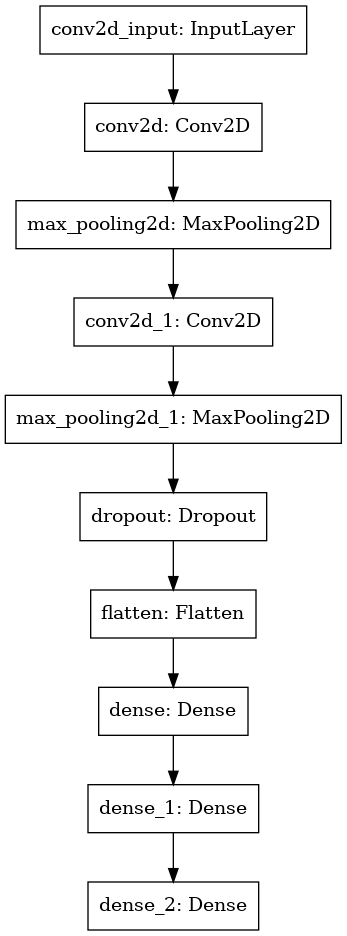

In [12]:
plot_model(model, show_layer_names=True)

In [13]:
checkpoint = ModelCheckpoint("eq_solver.h5", monitor='accuracy', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn = model.fit(X_train, cat, epochs=1000, batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

Epoch 1/1000
40/40 [==============================] - 2s 5ms/step - loss: 6.9297 - accuracy: 0.1661

Epoch 00001: accuracy improved from -inf to 0.16612, saving model to eq_solver.h5
Epoch 2/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.8256 - accuracy: 0.4416

Epoch 00002: accuracy improved from 0.16612 to 0.44156, saving model to eq_solver.h5
Epoch 3/1000
40/40 [==============================] - 0s 4ms/step - loss: 1.0180 - accuracy: 0.6770

Epoch 00003: accuracy improved from 0.44156 to 0.67699, saving model to eq_solver.h5
Epoch 4/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.7792

Epoch 00004: accuracy improved from 0.67699 to 0.77917, saving model to eq_solver.h5
Epoch 5/1000
40/40 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.8206

Epoch 00005: accuracy improved from 0.77917 to 0.82057, saving model to eq_solver.h5
Epoch 6/1000
40/40 [==============================] - 0s 5ms/step - loss:

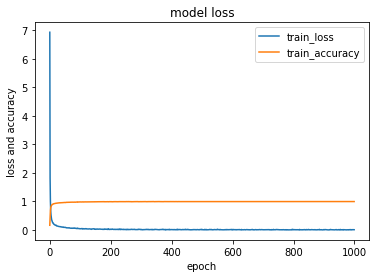

In [14]:
plt.plot(nn['loss'])
plt.plot(nn['accuracy'])
plt.title('model loss')
plt.ylabel('loss and accuracy')
plt.xlabel('epoch')
plt.legend(['train_loss', 'train_accuracy'], loc='upper right')

# Result

In [15]:
model = load_model("eq_solver.h5")

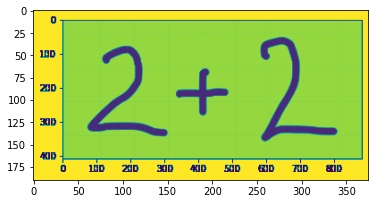

In [16]:
img = cv2.imread('../input/d/aatmajajoshi/maskiiiii/22.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [17]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

27
36
[[8, 159, 11, 8], [8, 121, 11, 8], [8, 83, 11, 8], [8, 45, 10, 8], [30, 11, 339, 160]]


In [18]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."
    if result[0] == 16 :
        equation = equation + "x"
    if result[0] == 17 :
        equation = equation + "y"      
    if result[0] == 18 :
        equation = equation + "z"
    
print("Your Equation :", equation)

Your Equation : ----0
